In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import silhouette_score

In [ ]:
# Load dataset
file_path = "/content/Cleaned_Accumulative_distribution.csv"
data = pd.read_csv(file_path)

In [ ]:
# Display dataset info
print("Dataset Preview:")
print(data.head())

Dataset Preview:
         ID           Type  Movie_number  Fly_number  Other_number  \
0 -1.731908  Dmelanogaster     -1.540178   -1.474087     -1.647509   
1 -1.731623  Dmelanogaster     -1.540178   -1.300665     -1.647509   
2 -1.731339  Dmelanogaster     -1.540178   -1.127243     -1.647509   
3 -1.731054  Dmelanogaster     -1.540178   -0.953821     -1.647509   
4 -1.730769  Dmelanogaster     -1.540178   -0.780399     -1.647509   

   Difference_x  Difference_y  Distance  
0     -0.291126      0.136903 -0.968219  
1     -0.714968     -0.445300 -0.413533  
2     -1.780003      1.731326  1.374617  
3     -1.871965     -1.020045  0.942211  
4     -0.289079      0.247088 -0.897781  


In [ ]:
# Encode categorical column (if "Type" exists)
if "Type" in data.columns:
    encoder = LabelEncoder()
    data["Type_encoded"] = encoder.fit_transform(data["Type"])
    data_numeric = data.drop(columns=["Type"])  # Drop original 'Type'
else:
    data_numeric = data.copy()

# **Supervised Learning**

**1️⃣ Regression (Predicting Distance)**

In [ ]:
X_reg = data_numeric.drop(columns=["Distance"])
y_reg = data_numeric["Distance"]

In [ ]:
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.25, random_state=42)
reg_model = LinearRegression()
reg_model.fit(X_train_reg, y_train_reg)
y_pred_reg = reg_model.predict(X_test_reg)

In [ ]:
print("\n🔹 Regression Model Performance:")
print("R² Score:", r2_score(y_test_reg, y_pred_reg))
print("RMSE:", np.sqrt(mean_squared_error(y_test_reg, y_pred_reg)))


🔹 Regression Model Performance:
R² Score: 0.19509373088751325
RMSE: 0.8960527863178356


**2️⃣ Classification (Binary Classification using 'Type' if available)**

In [ ]:
if "Type_encoded" in data.columns:
    X_clf = data_numeric.drop(columns=["Type_encoded"])
    y_clf = data_numeric["Type_encoded"]

    X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X_clf, y_clf, test_size=0.25, random_state=42)
    clf_model = LogisticRegression()
    clf_model.fit(X_train_clf, y_train_clf)
    y_pred_clf = clf_model.predict(X_test_clf)

    print("\n🔹 Classification Model Performance:")
    print("Accuracy:", accuracy_score(y_test_clf, y_pred_clf))
    print("Precision:", precision_score(y_test_clf, y_pred_clf, average="weighted"))
    print("Recall:", recall_score(y_test_clf, y_pred_clf, average="weighted"))
    print("F1 Score:", f1_score(y_test_clf, y_pred_clf, average="weighted"))
    print("\nClassification Report:\n", classification_report(y_test_clf, y_pred_clf))


🔹 Classification Model Performance:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       895
           1       1.00      1.00      1.00       989
           2       1.00      1.00      1.00      1156

    accuracy                           1.00      3040
   macro avg       1.00      1.00      1.00      3040
weighted avg       1.00      1.00      1.00      3040



# **Unsupervised Learning**

**K-Means Clustering**

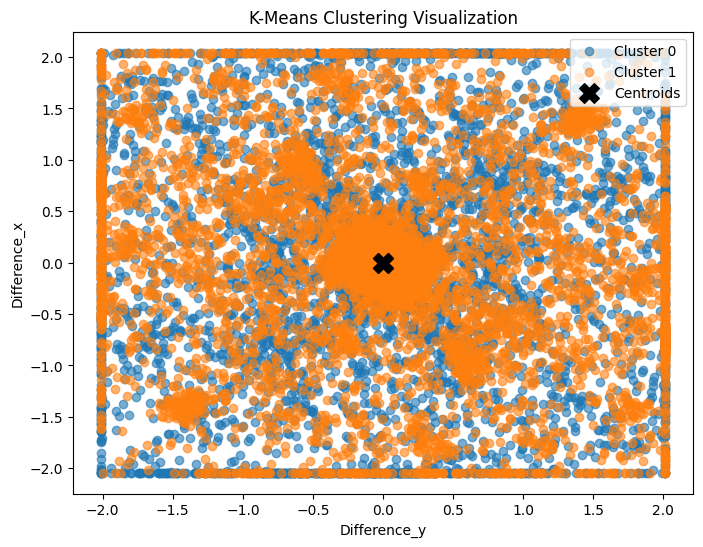


🔹 Clustering Metrics:
Silhouette Score: 0.19087302057057917
Inertia: 77229.78013831074


In [32]:
import matplotlib.pyplot as plt

# Select two features for clustering visualization
x_feature = "Difference_y"  # Change this if needed
y_feature = "Difference_x"  # Change this if needed

# Perform K-Means clustering
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
clusters = kmeans.fit_predict(data_numeric)

# Add cluster labels to the dataset
data_numeric["Cluster"] = clusters

# Scatter plot of clusters
plt.figure(figsize=(8, 6))
for cluster in range(2):
    plt.scatter(
        data_numeric[data_numeric["Cluster"] == cluster][x_feature],
        data_numeric[data_numeric["Cluster"] == cluster][y_feature],
        label=f"Cluster {cluster}",
        alpha=0.6
    )

# Plot cluster centroids
plt.scatter(
    kmeans.cluster_centers_[:, data_numeric.columns.get_loc(x_feature)],
    kmeans.cluster_centers_[:, data_numeric.columns.get_loc(y_feature)],
    s=200, c="black", marker="X", label="Centroids"
)

plt.xlabel(x_feature)
plt.ylabel(y_feature)
plt.title("K-Means Clustering Visualization")
plt.legend()
plt.show()

# Print clustering metrics
sil_score = silhouette_score(data_numeric.drop(columns=["Cluster"]), clusters)
print("\n🔹 Clustering Metrics:")
print("Silhouette Score:", sil_score)
print("Inertia:", kmeans.inertia_)
